**PROBLEM 5**

Part c)

Optical Recognition of Handwritten Digits Data Set:-

Description: 
The dataset consists of images of handwritten digits from 0 to 9. Therefore, there are 10 classes. Each image is 8x8 size which accounts for the 64 features. There are a total of 1797 rows which is the total number of datapoints. Each value in the dataset represent pixel values at different positions. 
This is a classification problem where the training dataset has to be classified into the 10 different classes. 

EDA:-

In [57]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame = True)
print(digits.data.shape)

(1797, 64)


In [3]:
digits.data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Displaying the first 5 rows and the 64 columns of the digits dataset using the .head() function.

In [4]:
digits.data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Using the .describe() function, we can check the number of datapoints in each column and that comes to a total of 1797. We can learn about the summary statistics like mean, min, max, std, median, etc from the above table.

In [5]:
digits.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

From the .info() function we can learn that there are no null values in the 1797 datapoints. All the 64 inputs are float64 values and there are no categorical variables.

<Figure size 432x288 with 0 Axes>

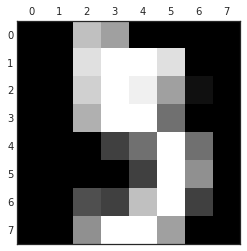

In [6]:
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show()

In [7]:
digits.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [8]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
unique_elements, counts_elements = np.unique(digits.images, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[0.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00
  6.0000e+00 7.0000e+00 8.0000e+00 9.0000e+00 1.0000e+01 1.1000e+01
  1.2000e+01 1.3000e+01 1.4000e+01 1.5000e+01 1.6000e+01]
 [5.6272e+04 4.0950e+03 3.2960e+03 2.9440e+03 3.2610e+03 2.8030e+03
  2.5590e+03 2.6270e+03 3.4640e+03 2.5850e+03 2.7110e+03 2.8450e+03
  3.6680e+03 3.5090e+03 3.6090e+03 4.3040e+03 1.0456e+04]]


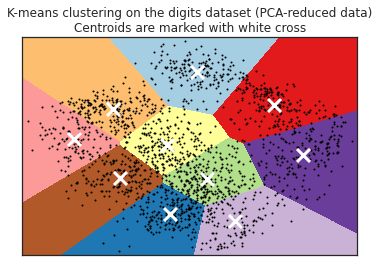

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

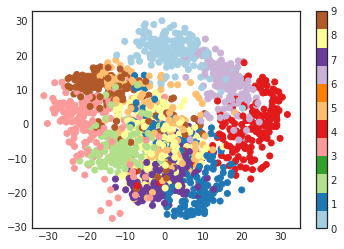

In [11]:
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

Description: 
The Principle Component Analysis technique is used in this problem to cluster the datapoints based on the different classes and to visualize the dataset. 

Part d)

Using 2 classes: 5 or not 5

In [12]:
digits.images[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [13]:
from sklearn.model_selection import train_test_split

bin_class = digits.target

bin_class = bin_class.replace([0,1,2,3,4,6,7,8,9],0)
bin_class = bin_class.replace([5],1)

X_train, X_test, y_train, y_test = train_test_split(digits.data, bin_class, test_size=0.5, shuffle=False)

In [14]:
bin_class.value_counts()

0    1615
1     182
Name: target, dtype: int64

In [15]:
X_train.shape

(898, 64)

**KNN - Binary Classification**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
train_predicted = neigh.predict(X_train)

In [19]:
import sklearn.metrics as metrics

print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_train, train_predicted)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      0.99      0.99        91

    accuracy                           1.00       898
   macro avg       1.00      0.99      1.00       898
weighted avg       1.00      1.00      1.00       898




In [20]:
predicted = neigh.predict(X_test)

In [21]:
neigh.score(X_test, y_test)

0.9933259176863182

In [22]:
print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.97      0.97      0.97        91

    accuracy                           0.99       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.99      0.99      0.99       899




Confusion matrix:
[[805   3]
 [  3  88]]


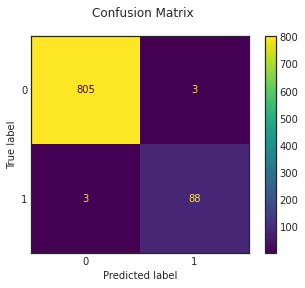

In [23]:
disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

From the confusion matrix we can see that the most of the datapoints have been correctly classified into the positive and negative classes(TP and TN). The accuracy of KNN for this binary classification is 99%.

**Logistic Regression - Binary Classification**

In [24]:
clf = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [25]:
training_predicted = clf.predict(X_train)

In [26]:
print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_train, training_predicted)}\n")

Classification report for classifier LogisticRegression(solver='newton-cg'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        91

    accuracy                           1.00       898
   macro avg       1.00      1.00      1.00       898
weighted avg       1.00      1.00      1.00       898




In [27]:
predicted = clf.predict(X_test)

In [28]:
clf.score(X_test, y_test)

0.9799777530589544

In [29]:
print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier LogisticRegression(solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       808
           1       0.88      0.93      0.90        91

    accuracy                           0.98       899
   macro avg       0.93      0.96      0.95       899
weighted avg       0.98      0.98      0.98       899




Confusion matrix:
[[796  12]
 [  6  85]]


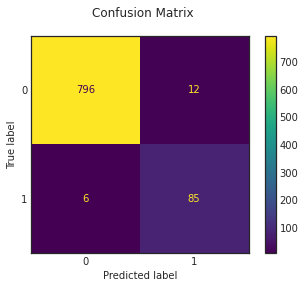

In [30]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

From the confusion matrix we can see that the most of the datapoints have been correctly classified into the positive and negative classes(TP and TN), but lesser compared to that of KNN. The accuracy of Logistic Regression for this binary classification is 97%.

**LDA - Binary Classification**

In [31]:
lda = LinearDiscriminantAnalysis(solver='svd')

In [32]:
ytrain_pred = lda.fit(X_train, y_train).predict(X_train)

In [33]:
print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       807
           1       1.00      0.95      0.97        91

    accuracy                           0.99       898
   macro avg       1.00      0.97      0.98       898
weighted avg       0.99      0.99      0.99       898




In [34]:
y_pred = lda.fit(X_train, y_train).predict(X_test)

In [35]:
lda.score(X_test,y_test)

0.9688542825361512

In [36]:
print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       808
           1       0.82      0.88      0.85        91

    accuracy                           0.97       899
   macro avg       0.91      0.93      0.92       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[791  17]
 [ 11  80]]


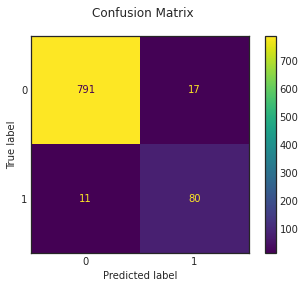

In [37]:
disp = metrics.plot_confusion_matrix(lda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

From the confusion matrix we can see that the most of the datapoints have been correctly classified into the positive and negative classes(TP and TN), but lesser compared to that of KNN and Logistic Regression. The accuracy of LDA for this binary classification is 96%.

**QDA -Binary Classification**

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

/home/poojanp/ml/my_env/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [39]:
ytrain_pred = qda.fit(X_train, y_train).predict(X_train)

/home/poojanp/ml/my_env/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [41]:
print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_train, ytrain_pred)}\n")

Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       807
           1       0.58      1.00      0.73        91

    accuracy                           0.93       898
   macro avg       0.79      0.96      0.85       898
weighted avg       0.96      0.93      0.93       898




In [42]:
y_pred = qda.predict(X_test)

In [43]:
qda.score(X_test, y_test)

0.8731924360400445

In [44]:
print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       0.98      0.87      0.93       808
           1       0.44      0.88      0.58        91

    accuracy                           0.87       899
   macro avg       0.71      0.88      0.75       899
weighted avg       0.93      0.87      0.89       899




Confusion matrix:
[[705 103]
 [ 11  80]]


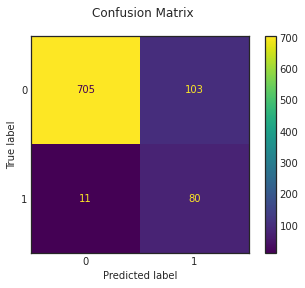

In [45]:
disp = metrics.plot_confusion_matrix(qda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

The confusion matrix above shows that there is an increase in the number of FP in this case. The QDA has 87% accuracy which is the least accuracy compared to the other classifiers.

Part e)

The dataset provided was split into training and test data for checking the performance of 4 different classifiers while performing binary classification.

Training dataset: Almost all of the classfiers had high accuracy in predicting the training set. The precision, recall and f1-score values were close to 1, almost everytime.

Test Data:-

KNN: Best performing classifier for binary classification of this data. It had the highest accuracy of 99%. It produced almost 1 precision, recall and f1-score values.

LR: Almost as good as KNN. It had an accuracy of 97% during the binary classification. The precision, recall and f1-score values range from 0.88-0.99.

LDA: A good classifier among the 4. The accuracy of this classifier is 96%. The precision, recall and f1-scores values range from 0.82-0.99.

QDA: The least performing classifier. The accuracy is only 87% while the other classifiers have accuracy greater than 95%. The precision, recall and f1-scores values go as low as 0.44.

Part f)

In [46]:
from sklearn.model_selection import train_test_split

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

**KNN**

In [47]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
predicted = neigh.predict(X_test)

In [49]:
print(f"Classification report for classifier {neigh}:\n"
f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.99      0.94      0.96        86
           3       0.91      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      1.00      0.99        89
           8       0.94      0.95      0.95        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  0 81  4  0  0  0  0  0  0]
 [ 0  0  0 84  0  1  0  2  3  1]
 [ 0  0  0  0 86  0  0  0  0  6]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  2  1  1  0  0  0  0 84  0]
 [ 0  0  0  3  0  2  0  0  1 86]]


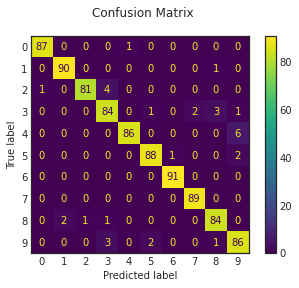

In [50]:
disp = metrics.plot_confusion_matrix(neigh, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

From the confusion matrix we can see that the almost all of the datapoints have been correctly classified into their respective classes. The accuracy of KNN for this multi-class classification is 96%.

**Logistic Regression**

In [51]:
clf = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [52]:
print(f"Classification report for classifier {clf}:\n"
f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier LogisticRegression(solver='newton-cg'):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.96      0.88      0.92        91
           2       0.99      0.98      0.98        86
           3       0.96      0.85      0.90        91
           4       0.98      0.92      0.95        92
           5       0.90      0.96      0.93        91
           6       0.92      0.99      0.95        91
           7       0.97      0.96      0.96        89
           8       0.87      0.89      0.88        88
           9       0.83      0.95      0.88        92

    accuracy                           0.93       899
   macro avg       0.94      0.93      0.93       899
weighted avg       0.94      0.93      0.93       899




Confusion matrix:
[[85  0  0  0  1  0  2  0  0  0]
 [ 0 80  0  1  0  0  0  0  2  8]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 77  0  4  0  2  7  1]
 [ 0  0  0  0 85  0  3  0  0  4]
 [ 0  0  0  0  0 87  2  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  0  0 85  1  2]
 [ 0  2  1  0  0  4  1  1 78  1]
 [ 1  0  0  0  0  2  0  0  2 87]]


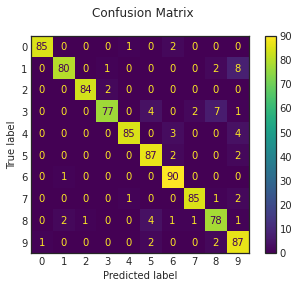

In [53]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

From the confusion matrix we can see that the most of the datapoints have been correctly classified into their respective classes. The accuracy of Logistic Regression for this multi-class classification is 93%.

**OVR**

In [58]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(skl_lm.LogisticRegression())
ovr_clf.fit(X_train, y_train)

data, labels = load_digits(return_X_y=True)
ovr_clf.predict([data[0]])

array([0])

In [60]:
digit_scores = ovr_clf.decision_function([data[0]])
digit_scores

array([[ 11.56408419, -40.04403942, -17.06025813, -12.01267365,
        -19.1480992 , -16.04669872, -18.62383451, -13.98168268,
        -16.03569085, -16.74098171]])

In OneVsRest Classifier, the prediction for data[0] was performed correctly as the digit_scores has the highest value at the 0th position.

**LDA**

In [61]:
lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X_train, y_train).predict(X_test)

In [62]:
print(f"Classification report for classifier {lda}:\n"
f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier LinearDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.92      0.89      0.91        91
           2       0.97      0.91      0.94        86
           3       0.90      0.92      0.91        91
           4       0.99      0.90      0.94        92
           5       0.90      0.95      0.92        91
           6       0.95      0.99      0.97        91
           7       0.96      0.92      0.94        89
           8       0.90      0.83      0.86        88
           9       0.79      0.91      0.84        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.92      0.92       899




Confusion matrix:
[[87  0  0  0  0  0  1  0  0  0]
 [ 0 81  0  0  0  0  1  0  1  8]
 [ 1  0 78  5  0  0  0  0  1  1]
 [ 0  1  1 84  0  1  1  0  3  0]
 [ 1  1  0  0 83  0  0  1  2  4]
 [ 0  0  0  0  0 86  2  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  1  1  3  0 82  0  2]
 [ 0  4  0  1  0  4  0  1 73  5]
 [ 1  0  1  2  0  2  0  1  1 84]]


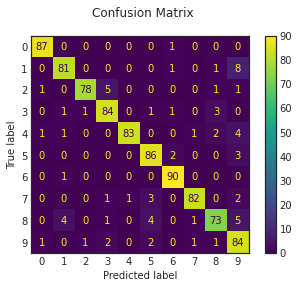

In [63]:
disp = metrics.plot_confusion_matrix(lda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

From the confusion matrix we can see that the most of the datapoints have been correctly classified into their respective classes, similar to the case of Logistic Regression. The accuracy of LDA for this multi-class classification is 92%.

**QDA**

In [64]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [65]:
y_pred = qda.predict(X_test)

In [66]:
print(f"Classification report for classifier {qda}:\n"
f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier QuadraticDiscriminantAnalysis():
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        88
           1       0.61      0.98      0.75        91
           2       0.94      0.87      0.90        86
           3       0.60      0.89      0.72        91
           4       0.94      0.72      0.81        92
           5       0.57      0.84      0.68        91
           6       0.94      1.00      0.97        91
           7       0.77      0.78      0.77        89
           8       0.80      0.27      0.41        88
           9       0.77      0.26      0.39        92

    accuracy                           0.75       899
   macro avg       0.79      0.75      0.74       899
weighted avg       0.79      0.75      0.73       899




Confusion matrix:
[[83  0  0  1  2  2  0  0  0  0]
 [ 0 89  1  0  0  1  0  0  0  0]
 [ 0  8 75  0  0  1  2  0  0  0]
 [ 0  5  0 81  0  3  0  1  1  0]
 [ 1  4  1  0 66  1  1 14  0  4]
 [ 0  4  0  9  0 76  2  0  0  0]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  2  0  3  2 10  0 69  2  1]
 [ 0 20  3 23  0 13  0  3 24  2]
 [ 1 15  0 18  0 27  1  3  3 24]]


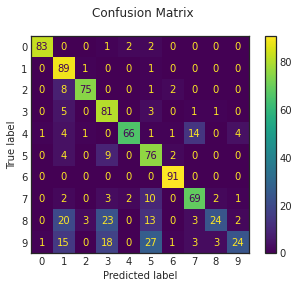

In [67]:
disp = metrics.plot_confusion_matrix(qda, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

The confusion matrix shows that a lot of the datapoints have not been correctly classified into their respective classes. The accuracy of QDA for this multi-class classification is 75%. This is the least performing classifier compared to the rest of the classifiers.